# Lab 1 MA course in Artificial Intelligence 2020/2021

Firts, let's download the repo with useful code and data from Github

In [1]:
!rm -r AI2020/
!git clone https://github.com/UmbertoJr/AI2020.git

Cloning into 'AI2020'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 448 (delta 26), reused 33 (delta 14), pack-reused 399
Receiving objects: 100% (448/448), 1.05 MiB | 14.75 MiB/s, done.
Resolving deltas: 100% (272/272), done.


In [2]:
import os


os.listdir("./AI2020")

['solvers',
 'run.py',
 'problems',
 '.git',
 'ILS_for_the_TSP.ipynb',
 'introduction_to_the_KP.ipynb',
 'README.md',
 'introduction_to_the_TSP.ipynb',
 'IO_manager']

## Travelling Salesman Problem


"*Given a set of points in a space, what is the shape of the shortest tour that visits each point and returns to the first point of the tour?*”

&nbsp;

### How to read or generate an instance of the TSP

The **TSP_Instance_Creator** class can:

* generartes a "'random'" TSP instance, by taking as input the random seed and the dimension (or number) of points.

* uploads a "'standard'" TSP instance from the files available in "./AI2020/problems/TSP/".


&nbsp;

The object created has the following properties:

    nPoints          : integer defining the total number of points in the current instance

    best_sol         : float storing the best solution known for that instance 

    name             : string with the name of the current instance

    dist_matrix      : matrix with dimension (nPoints x nPoints) representing the distance values between each point

    points           : matrix with dimension (nPoints x 3), the first column  reports the indeces of each ciy,
                       while the second and the third columns report the 'x' and 'y' coordinates for the points

    LB               : if the instance is generated randomly a Lower Bound (LB) for the solution is provided

    problems         : a list with the names of standard instances available in the repository

    exist_opt        : boolean notifying if the optimal solution is available 


&nbsp;

and the following methods:

    print_info()             : prints the name, the number of points (nPoints) and the best known solution for the considere instance

    plot_data()              : plots the points in the current instance

    plot_optimal_solution()  : if exist_opt = True, it plots the optimal solution 

name: random 123
nPoints: 200
LB_sol: 989.0


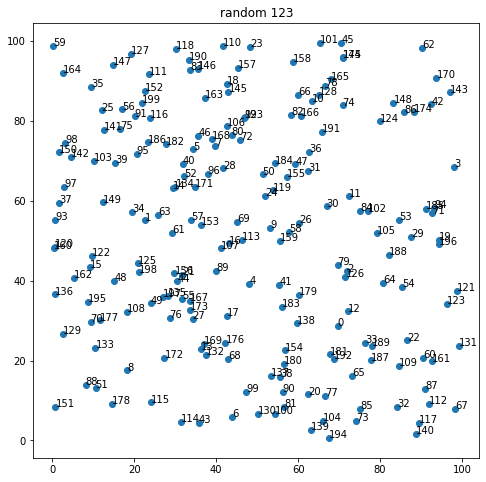

[[ 0. 54. 14. ... 43. 50. 74.]
 [54.  0. 51. ... 20. 13. 29.]
 [14. 51.  0. ... 45. 51. 66.]
 ...
 [43. 20. 45. ...  0.  9. 49.]
 [50. 13. 51. ...  9.  0. 42.]
 [74. 29. 66. ... 49. 42.  0.]]


In [3]:
from AI2020.IO_manager.io_tsp import TSP_Instance_Creator
# if you are running from your local remove the prefix AI2020 (comment the previous line and uncomment the following line)
# from IO_manager.io_tsp import TSP_Instance_Creator


ic = TSP_Instance_Creator("random", seed=123, dimension=200) # in case dimension is undefined it takes a random number between 100 and 300
ic.print_info()
ic.plot_data()
print(ic.dist_matrix)

In [4]:
print(ic.problems)

['fl1577.tsp', 'pr439.tsp', 'ch130.tsp', 'rat783.tsp', 'd198.tsp', 'kroA100.tsp', 'u1060.tsp', 'lin318.tsp', 'eil76.tsp', 'pcb442.tsp']


name: u1060
nPoints: 1060
best_sol: 224094.0


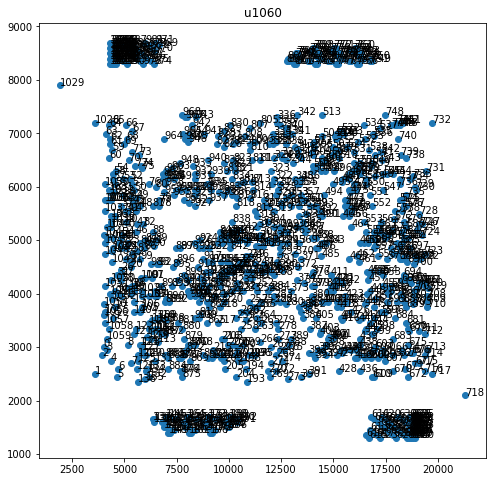

[[   0.  640.  158. ...  452.  430.  212.]
 [ 640.    0.  495. ... 1051. 1070.  851.]
 [ 158.  495.    0. ...  608.  583.  360.]
 ...
 [ 452. 1051.  608. ...    0.  224.  316.]
 [ 430. 1070.  583. ...  224.    0.  224.]
 [ 212.  851.  360. ...  316.  224.    0.]]


In [5]:

ic = TSP_Instance_Creator("standard", 'u1060.tsp')
ic.print_info()
ic.plot_data()
print(ic.dist_matrix)

name: eil76
nPoints: 76
best_sol: 538.0


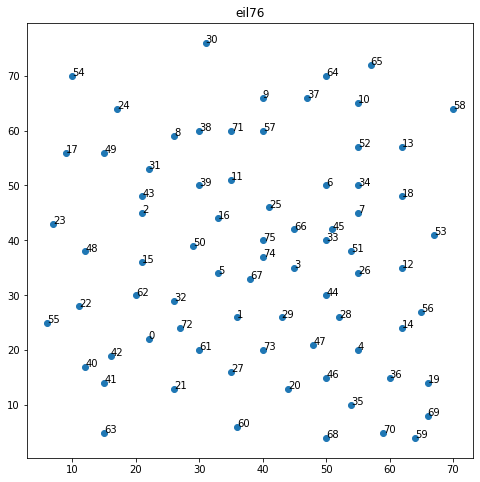

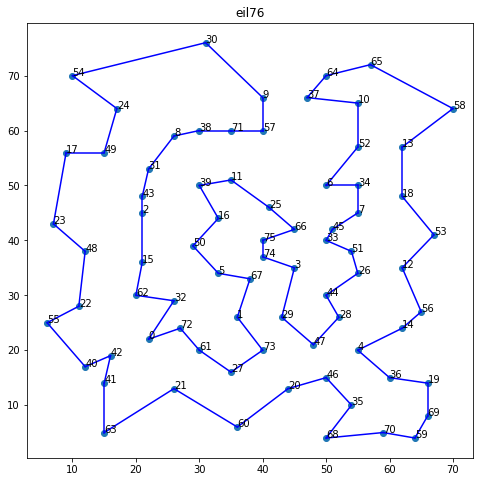

In [7]:
ic = TSP_Instance_Creator("standard", 'eil76.tsp')
ic.print_info()
ic.plot_data()
ic.plot_optimal_solution()

### Ho to create solutions for the TSP

The class **Solver_TSP** can:
* handle heuristics for your TSP instance:
   
   * constructive heuristics or initializers

    ```python
    def constructive_heuristics(dist_matrix):
        ''' 
        the implementation takes as input
          dist_matrix : matrix giving the distances between each point
        
        and must return:
          solution : list representing the created tour  
          cost_sol : float showing the cost for the created tour
        '''

        #   your   code
        return solution, cost_sol
    ```

    the constructive_heuristics is added during the initialization of the class

    ```python
        solver = Solver_TSP(('my contructive', constructive_heuristics))
    ``` 

   * meta-heuristics or improvements

    ```python
    def meta_heuristics(solution, cost_sol, dist_matrix):
    '''
    the implementation takes as input
         solution : list, it represents the input solution
         cost_sol : float, it shows the input cost solution 
        
    must return:
         best_solution : list, it represents the current best tour
         best_cost : float,  shows the current best solution
         number_of_local_search_calls : int, it counts how many times the local search is been called
         end_condition : boolean, is True if the ending condition for the meta is reached
    '''
        while not end_condition:
            #code
            yield best_solution, best_cost, number_of_local_search_calls, end_condition
    ```

    the meta_heuristics is added with the bind operation

    ```python
        solver.bind(('my meta', meta_heuristics))
    ``` 

  where the **dist_matrix** is the distance matrix provided by the *TSP_instance_creator* object, and the **solution** is a list or numpy array with lenght equal to the *nPoints* in the current instance, pointing at the indeces of the cities.

* ensure time constraint, exploiting the [quarantine style](https://www.oreilly.com/library/view/exercises-in-programming/9781482227376/K22536_C024.xhtml), the count starts when the object solver is called to run on the instance.

     ```python
solver(instance_object)
     ```

     the solver object runs the constructive and meta one after the other.


* provide some useful properties and methods:


    solution                : list or numpy array stored as final solution 

    found_length            : float reporting the current best solution cost  

    available_initializers  : dictionary with the already implemented constructive heuristics. 
                              The name is the key, while the value is a variable storing the function.

    available_improvements  : dictionary with the already implemented meta-heuristics. 
                              The name is the key, while the value is a variable storing the function.

    seed                    : initial random seed to be set with the initialization. 

    max_time                : seconds available to run your implementation

    ls_calls                : number of local search calls during the run

    time_to_solve           : actual time employed to solve the instance

    gap                     : relative error from the optimal solution

    plot_solution()         : method that plots you current solution

In [8]:
# example of a contructive heuristic
def random_method(dist_matrix):
      n = int(dist_matrix.shape[0])
      solution = np.random.choice(np.arange(n), size=n, replace=False).tolist()
      return solution, compute_lenght(solution, dist_matrix)


def compute_lenght(solution, dist_matrix):
    total_length = 0
    starting_node = solution[0]
    from_node = starting_node
    for node in solution[1:]:
        total_length += dist_matrix[from_node, node]
        from_node = node
    total_length += dist_matrix[from_node, starting_node]
    return total_length


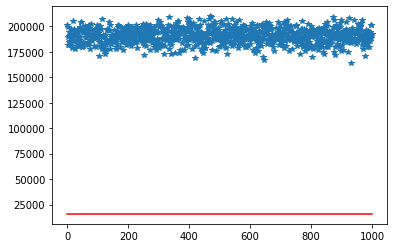

best solution 163455.0 on 1000 tials,
with a total time of 0.2 seconds
the gap is 1119.36%


In [9]:
import numpy as np
from time import time as t
import matplotlib.pyplot as plt

from AI2020.solvers.TSP_solver import Solver_TSP
# if you are running from your local remove the prefix AI2020 (comment the previous line and uncomment the following line)
# from solvers.TSP_solver import Solver_TSP

ic = TSP_Instance_Creator("standard", 'd198.tsp')

number_of_trials = 1000
found_lens = []
start = t()
solver = Solver_TSP(('random', random_method))
for _ in range(number_of_trials):
  solver(ic)
  found_lens.append(solver.found_length)
end = t()
plt.plot(found_lens, "*")
plt.plot(np.ones(1000)*ic.best_sol, "r-")
plt.show()

print(f"best solution {min(found_lens)} on {number_of_trials} tials,\nwith a total time of {np.round(end - start, 2)} seconds\nthe gap is {solver.gap}%")


In [10]:
 def nn(dist_matrix, starting_node=0):
        dist_matrix = np.copy(dist_matrix)
        n = int(dist_matrix.shape[0])
        node = starting_node
        tour = [node]
        for _ in range(n - 1):
            for new_node in np.argsort(dist_matrix[node]):
                if new_node not in tour:
                    tour.append(new_node)
                    node = new_node
                    break
        return tour, compute_lenght(tour, dist_matrix)

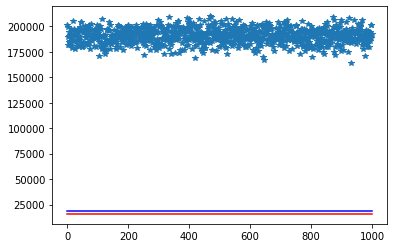

best solution 18975.0 on 1 NN tials,
with a total time of 0.01 seconds
the gap is 20.25%


In [11]:
solver = Solver_TSP(('nearest neighbor', nn))
solver(ic)

plt.plot(found_lens, "*")
plt.plot(np.ones(1000)*ic.best_sol, "r-")
plt.plot(np.ones(1000)*solver.found_length, "b-")
plt.show()

print(f"best solution {solver.found_length} on 1 NN tials,\nwith a total time of {np.round(solver.time_to_solve, 2)} seconds\nthe gap is {solver.gap}%")


### How to test different combinations of heuristics

Here it is an example on how to use the proposed classes to test different initializations and improvers  

In [12]:
import pandas as pd
verbose = False
show_plots = False

def add(solver, instance, improve, index, results, verbose ):
  solver.bind((improve, improve_functions[improve]))
  solver(instance)
  index.append((name, instance.best_sol, solver.name_method))
  results.append([solver.found_length, solver.gap, solver.time_to_solve])

names = ["eil76.tsp"] #"d198.tsp" , "kroA100.tsp"
initializers = [i for i in Solver_TSP.available_initializers.keys()] 
init_functions = Solver_TSP.available_initializers
improvements = Solver_TSP.available_improvements.keys()
improve_functions = Solver_TSP.available_improvements
results = []
index = []
for name in names:
    instance = TSP_Instance_Creator("standard", name)
    if verbose:
        print("\n\n#############################")
        instance.print_info()
    if show_plots:      
        instance.plot_data()

    for init in initializers:
        for improve in improvements:
          solver = Solver_TSP((init, init_functions[init]))
          add(solver, instance, improve, index, results, verbose)
          for improve2 in [j for j in improvements if j not in [improve]]:
            add(solver, instance, improve2, index, results, verbose )
            solver.pop()


          
    if instance.exist_opt and show_plots:
        solver.solution = np.concatenate([instance.optimal_tour, [instance.optimal_tour[0]]])
        solver.method = "optimal"
        solver.plot_solution()

index = pd.MultiIndex.from_tuples(index, names=['problem','optimal lenght', 'method'])

In [13]:
pd.DataFrame(results, index=index, columns=["tour length", "gap", "time to solve"])

tour length  ...  time to solve
problem   optimal lenght method                                                           ...               
eil76.tsp 538.0          initialized with random, improved with 2-opt              619.0  ...          0.108
                         initialized with random, improved with 2-opt, i...        594.0  ...          0.389
                         initialized with random, improved with 2.5-opt            614.0  ...          0.445
                         initialized with random, improved with 2.5-opt,...        581.0  ...          0.401
                         initialized with nearest_neighbors, improved wi...        624.0  ...          0.089
                         initialized with nearest_neighbors, improved wi...        622.0  ...          0.263
                         initialized with nearest_neighbors, improved wi...        652.0  ...          0.539
                         initialized with nearest_neighbors, improved wi...        620.0  ...          0.596
                         initialized with multi_fragment, improved with ...        564.0  ...          0.083
                         initialized with multi_fragment, improved with ...        554.0  ...          0.256
                         initialized with multi_fragment, improved with ...        551.0  ...          0.274
                         initialized with multi_fragment, improved with ...        551.0  ...          0.300

[12 rows x 3 columns]